<a href="https://colab.research.google.com/github/H1103/Class-119-Decision-Tree/blob/main/Class_119_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
datatoload = files.upload()

Saving diabetes.csv to diabetes.csv


Decision Tree is a Machine Learning Algorithm which is used in supervised learning. Decision Tree is making future decisions based on previous predictions. There are three layers. first is root node, second is internal node and the third is leaf node. the root node is also called as the decision node and is the one which represents the entire population. the internal node 

ASM or Attribute Selection Measure  which is used for selecting the splitting criteria. which will split data in the best possible manner. It provides a rank to each feature by epxlaining the given dataset. The feature with the best rank as the splitting attribute.

In [ ]:
import pandas as pd
# column name
col_names = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age', 'label']
df = pd.read_csv("diabetes.csv", names = col_names).iloc[1:]
print(df.head())



  Pregnancies Glucose BloodPressure  ... DiabetesPedigreeFunction Age label
1           6     148            72  ...                    0.627  50     1
2           1      85            66  ...                    0.351  31     0
3           8     183            64  ...                    0.672  32     1
4           1      89            66  ...                    0.167  21     0
5           0     137            40  ...                    2.288  33     1

[5 rows x 9 columns]


In [ ]:
features = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
X = df[features]
y = df.label



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
# initializng the decision tree model
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# calculating the accuracy of a model
y_pred = clf.predict(X_test)
print("Accuracy is:", metrics.accuracy_score(y_test, y_pred))


Accuracy is: 0.6926406926406926


In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image 
import pydotplus

# where we will store the data from decision tree classifier as text
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled= True, rounded= True, special_characters= True, feature_names = features, class_names = ['0','1'])
print(dot_data.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<Glucose &le; 129.5<br/>gini = 0.449<br/>samples = 537<br/>value = [354, 183]<br/>class = 0>, fillcolor="#f2c29f"] ;
1 [label=<BMI &le; 26.3<br/>gini = 0.329<br/>samples = 357<br/>value = [283, 74]<br/>class = 0>, fillcolor="#eca26d"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<BMI &le; 9.1<br/>gini = 0.06<br/>samples = 97<br/>value = [94, 3]<br/>class = 0>, fillcolor="#e6853f"] ;
1 -> 2 ;
3 [label=<Pregnancies &le; 7.5<br/>gini = 0.444<br/>samples = 6<br/>value = [4, 2]<br/>class = 0>, fillcolor="#f2c09c"] ;
2 -> 3 ;
4 [label=<gini = 0.0<br/>samples = 4<br/>value = [4, 0]<br/>class = 0>, fillcolor="#e58139"] ;
3 -> 4 ;
5 [label=<gini = 0.0<br/>samples = 2<br/>value = [0, 2]<br/>class = 1>, fillcolor="#399de5"] ;
3 -> 5 ;
6 [label=<DiabetesPedigreeFunction &le; 0.669<br/>gini = 0.022<br/>samples = 91<br/>value = [90, 1]<br/>cla

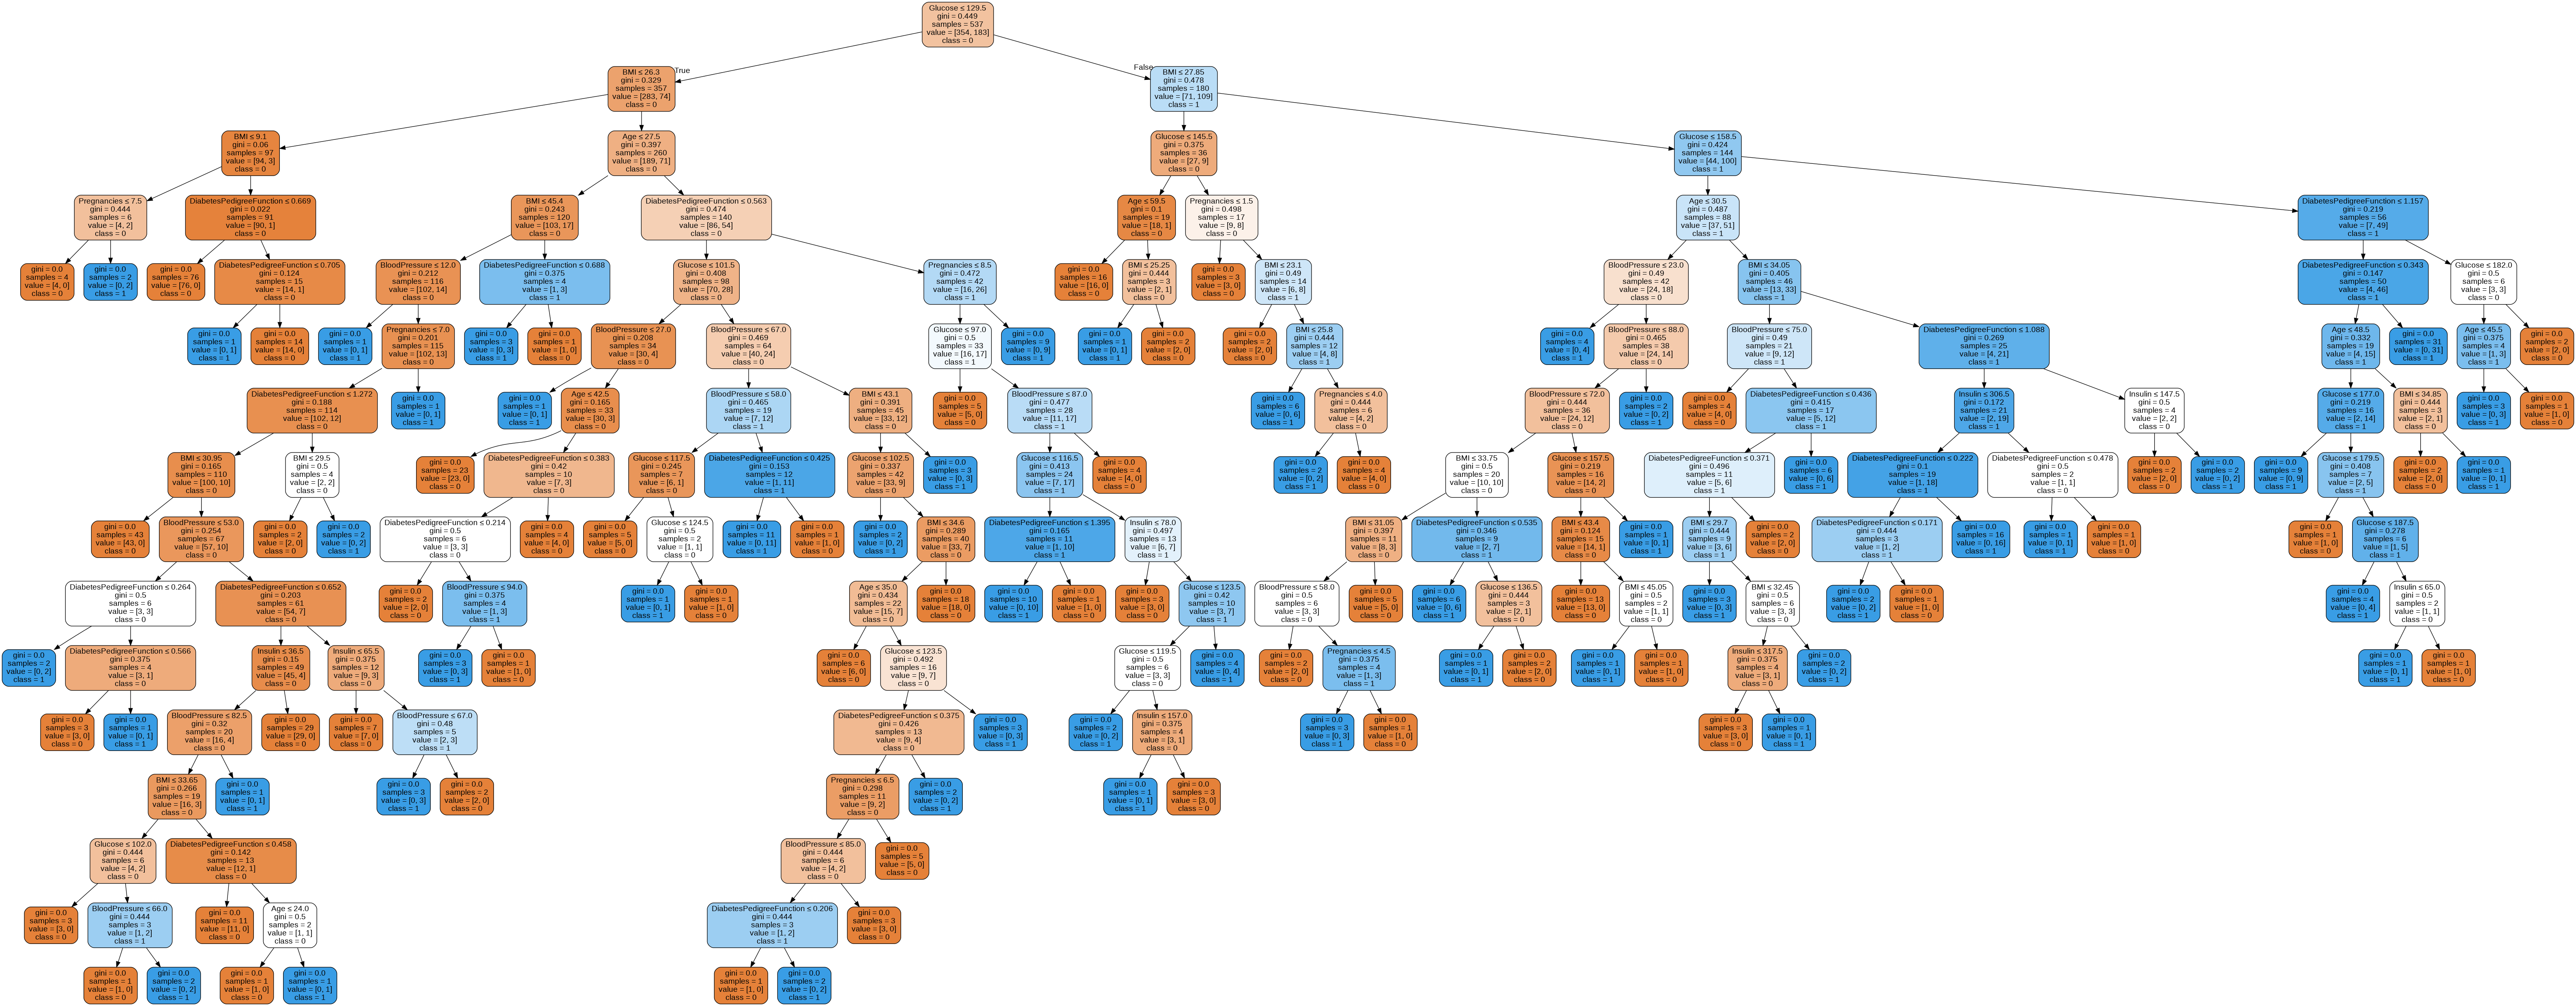

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

Accuracy is 75.75757575757575


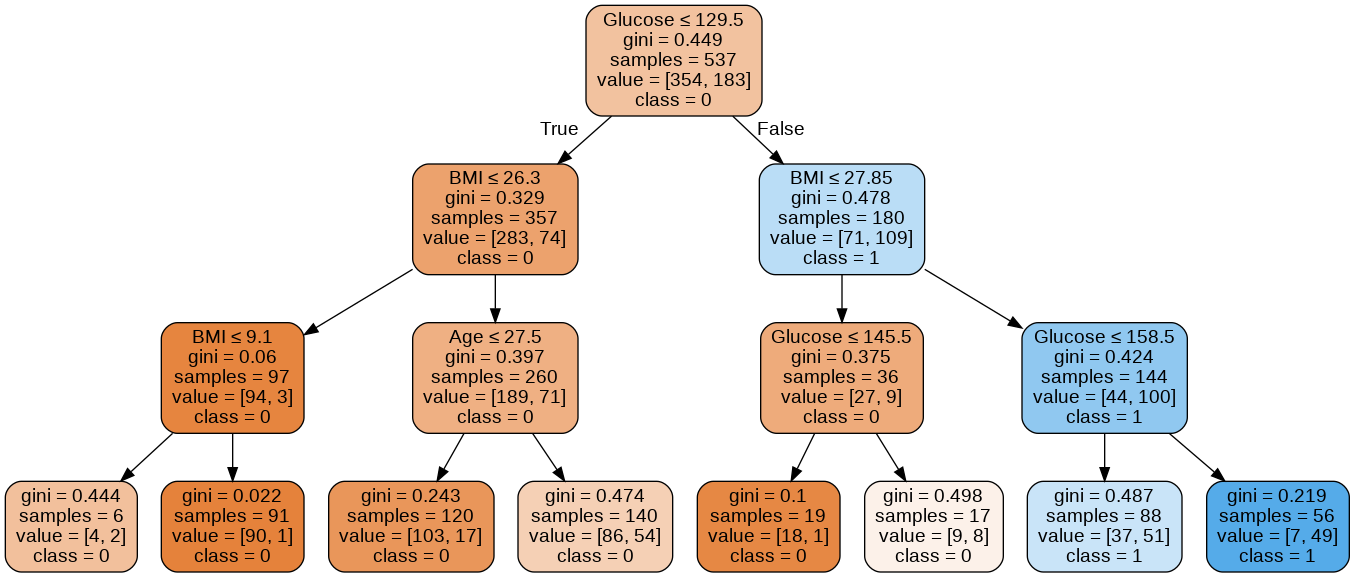

In [ ]:
clf = DecisionTreeClassifier(max_depth= 3)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy is", metrics.accuracy_score(y_test, y_pred)*100)
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled= True, rounded= True, special_characters= True, feature_names = features, class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

# Conclusion
with 75% accuracy we can say people having glucose ≤ 129.5 and BMI ≤ 27.85 are more prone to have diabetes. 